# 线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import read_data as rd
from metrics import cwcf, picpf, pinewf

In [2]:
# time series(pd.series) for smooth trend and period workload
ts_sm, ts_tr, ts_pe = rd.load_sp()

# 1. Train and Test for smooth workload

In [3]:
# split to train and test
ts_u_train, ts_u_test, ts_l_train, ts_l_test, ts_train, ts_test = rd.split_train_test(ts_sm)

In [4]:
def linear_predict(cv_tr, cv_te, linreg):
    X_t, y_t = rd.split_to_xy(cv_tr)
    X_e, y_e = rd.split_to_xy(cv_te)
    linreg.fit(X_t, y_t)
    pred = linreg.predict(X_e)
    return pred

## Cross validation

In [5]:
cv = 3
tscv = TimeSeriesSplit(n_splits=cv)

cwc 5.486876, picp 0.583333, pinew 0.819826


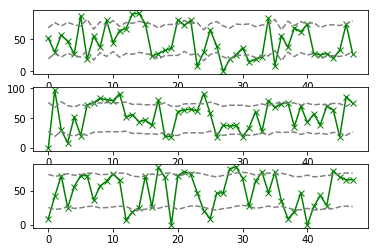

In [6]:
plt_num = cv*100+10+1
cv_t, cv_u, cv_l = np.array(ts_train), np.array(ts_u_train), np.array(ts_l_train)
picp, pinew, cwc = 0, 0, 0
for tr_idx, te_idx in tscv.split(cv_t):
    cv_tr_u, cv_te_u = cv_u[tr_idx], cv_u[te_idx]
    cv_tr_l, cv_te_l = cv_l[tr_idx], cv_l[te_idx]
    cv_tr_t, cv_te_t = cv_t[tr_idx], cv_t[te_idx]
    
    linreg_u = LinearRegression()
    linreg_l = LinearRegression()
    
    pred_u = linear_predict(cv_tr_u, cv_te_u, linreg_u)
    pred_l = linear_predict(cv_tr_l, cv_te_l, linreg_l)
    d = max(len(cv_te_t) - len(pred_u), len(cv_te_t) - len(pred_l))
    
    # 画图
    plt.subplot(plt_num)
    rd.plot_ts_ul(cv_te_t[d:], pred_u, pred_l)
    
    # 计算picp，pinew，cwc
    picp += picpf(cv_te_t[d:], pred_u, pred_l)
    pinew += pinewf(pred_u, pred_l)
    cwc += cwcf(picp, pinew)
    
    plt_num += 1
print("cwc %f, picp %f, pinew %f" % (cwc/cv, picp/cv, pinew/cv))

# 2. Test result

In [7]:
test = np.array(ts_test)
u_train, u_test = np.array(ts_u_train), np.array(ts_u_test)
l_train, l_test = np.array(ts_l_train), np.array(ts_l_test)

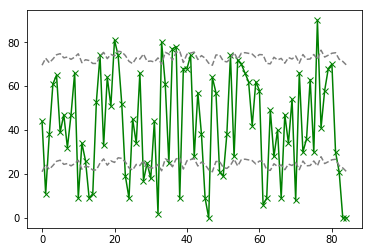

In [8]:
linreg_u = LinearRegression()
linreg_l = LinearRegression()
pred_u = linear_predict(u_train, u_test, linreg_u)
pred_l = linear_predict(l_train, l_test, linreg_l)
d = max(len(test) - len(pred_u), len(test) - len(pred_l))
rd.plot_ts_ul(test[d:], pred_u, pred_l)

In [9]:
picp = picpf(test[d:], pred_u, pred_l)
pinew = pinewf(pred_u, pred_l)
cwc = cwcf(picp, pinew)
print("cwc %f, picp %f, pinew %f" % (cwc, picp, pinew))

cwc 10.648831, picp 0.658824, pinew 0.876185


# 检验

In [10]:
from predict_fx import predict_diff, predict_sp_diff

## 检验 smooth

linear
Result of Cross validation: 
cwc 2.548197, picp 0.791667, pinew 0.620445
Result of Test validation: 
cwc 0.678323, picp 0.917647, pinew 0.678323


(0.678323193419659, 0.9176470588235294, 0.678323193419659)

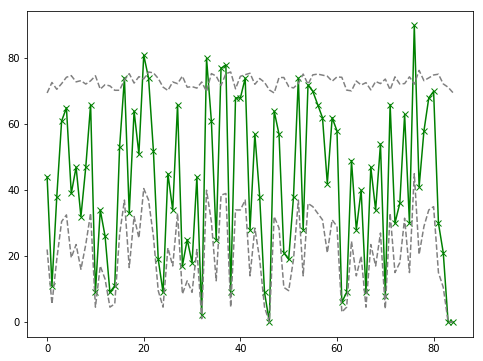

In [11]:
predict_diff(ts_sm, 'linear', is_plt=True)

## 检验 trend

linear
Result of Cross validation: 
cwc 3.370981, picp 0.736111, pinew 0.373838
Result of Test validation: 
cwc 0.800057, picp 0.882353, pinew 0.364823


(0.8000565112071882, 0.8823529411764706, 0.3648229606520103)

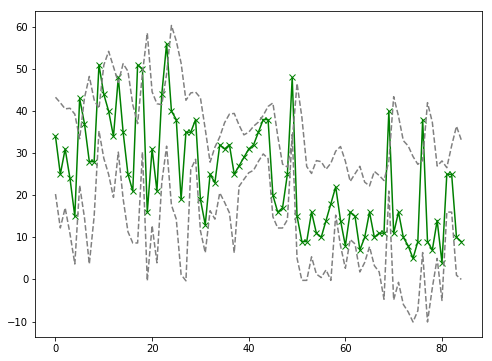

In [12]:
predict_diff(ts_tr, 'linear', is_plt=True)

## 检验period

linear
Result of Cross validation: 
cwc 10.207799, picp 0.708333, pinew 0.321454
Result of Test validation: 
cwc 0.578540, picp 0.882353, pinew 0.263812


(0.5785397791963544, 0.8823529411764706, 0.2638121084508186)

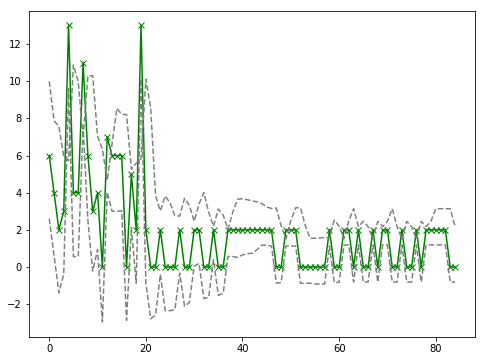

In [13]:
predict_diff(ts_pe, 'linear', is_plt=True)

In [14]:
predict_sp_diff('linear')

Using linear 'model' to predict
linear
Result of Cross validation: 
cwc 2.548197, picp 0.791667, pinew 0.620445
Result of Test validation: 
cwc 0.678323, picp 0.917647, pinew 0.678323
linear
Result of Cross validation: 
cwc 3.370981, picp 0.736111, pinew 0.373838
Result of Test validation: 
cwc 0.800057, picp 0.882353, pinew 0.364823
linear
Result of Cross validation: 
cwc 10.207799, picp 0.708333, pinew 0.321454
Result of Test validation: 
cwc 0.578540, picp 0.882353, pinew 0.263812

Final Result:
cwc 0.685640, picp 0.894118, pinew 0.435653
